C:\Users\jiin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


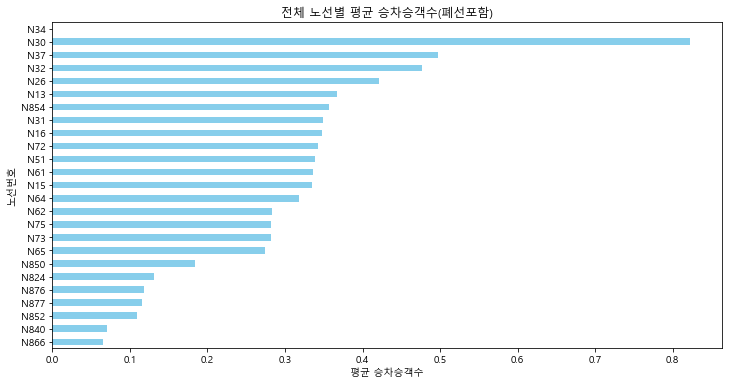

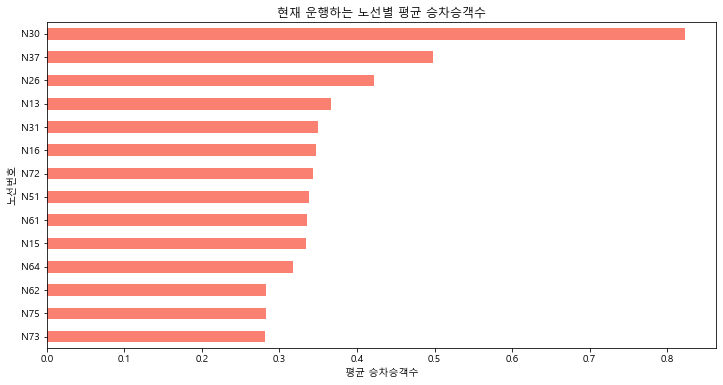

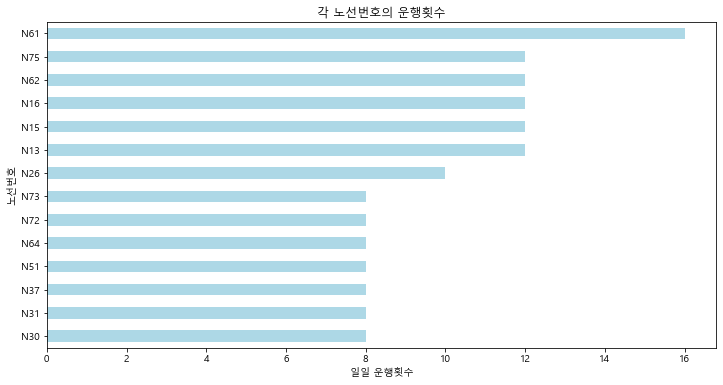

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\jiin\Desktop\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

# 모든 노선번호에 대한 회당평균승차승객수를 저장할 데이터프레임
overall_average_df = pd.DataFrame()

# 현재 운행하는 노선번호
target_routes = ['N13', 'N15', 'N16', 'N26', 'N30', 'N31', 'N37', 'N51','N61', 'N62', 'N64', 'N72', 'N73', 'N75']

# 노선번호별 회당평균승차승객수를 저장할 데이터프레임 (현재 운행하는 노선만)
target_average_df = pd.DataFrame()

# 각 연도별로 데이터 처리
for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    
    # CSV 파일을 데이터프레임으로 읽어오기
    df = pd.read_csv(file_path, encoding='cp949')
    
    # '회당평균승차승객수' 열의 데이터 타입을 숫자(float)로 변환
    df['회당평균승차승객수'] = pd.to_numeric(df['회당평균승차승객수'], errors='coerce')
    
    # 전체 노선번호별로 그룹화하여 회당평균승차승객수의 평균 계산
    avg_boarding_per_route = df.groupby('노선번호')['회당평균승차승객수'].mean().reset_index()
    
    # 노선번호를 인덱스로 설정
    avg_boarding_per_route.set_index('노선번호', inplace=True)
    
    # 데이터프레임을 미리 생성한 데이터프레임에 추가
    overall_average_df = pd.concat([overall_average_df, avg_boarding_per_route], axis=1)
    
    # 현재 운행하는 노선번호에 해당하는 데이터만 선택
    filtered_df = df[df['노선번호'].isin(target_routes)]
    
    # 현재 운행하는 노선번호별로 그룹화하여 회당평균승차승객수의 평균 계산
    target_avg_boarding_per_route = filtered_df.groupby('노선번호')['회당평균승차승객수'].mean().reset_index()
    
    # 노선번호를 인덱스로 설정
    target_avg_boarding_per_route.set_index('노선번호', inplace=True)
    
    # 데이터프레임을 미리 생성한 데이터프레임에 추가
    target_average_df = pd.concat([target_average_df, target_avg_boarding_per_route], axis=1)

# 모든 노선번호에 대한 평균값 계산
overall_average = overall_average_df.mean(axis=1)

# 시각화 - 전체 노선번호
plt.figure(figsize=(12, 6))
ax = overall_average.sort_values().plot(kind='barh', color='skyblue')
plt.title('전체 노선별 평균 승차승객수(폐선포함)')
plt.xlabel('평균 승차승객수')
plt.ylabel('노선번호')

plt.show()

# 모든 노선번호에 대한 평균값 계산 (현재 운행하는 노선만)
target_overall_average = target_average_df.mean(axis=1)

# 시각화 - 현재 운행하는 노선번호만
plt.figure(figsize=(12, 6))
ax = target_overall_average.sort_values().plot(kind='barh', color='salmon')
plt.title('현재 운행하는 노선별 평균 승차승객수')
plt.xlabel('평균 승차승객수')
plt.ylabel('노선번호')

plt.show()

# 각 노선번호 운행횟수 추출
first_encounter_operation_count = df.groupby('노선번호')['일일운행횟수'].first()

# 시각화 - 각 노선번호 운행횟수
plt.figure(figsize=(12, 6))
ax = first_encounter_operation_count.sort_values().plot(kind='barh', color='lightblue')
plt.title('각 노선번호의 운행횟수')
plt.xlabel('일일 운행횟수')
plt.ylabel('노선번호')

plt.show()

C:\Users\jiin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


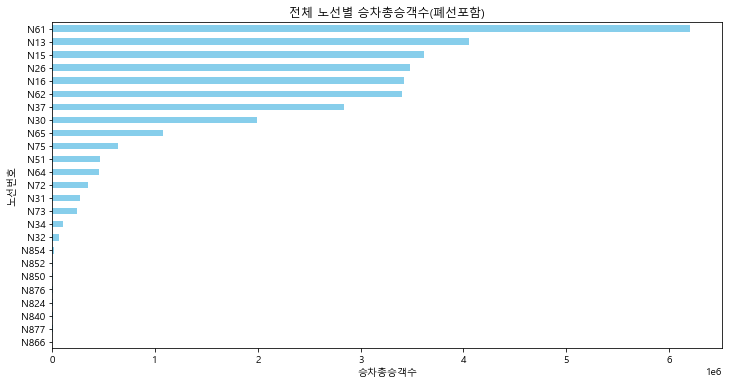

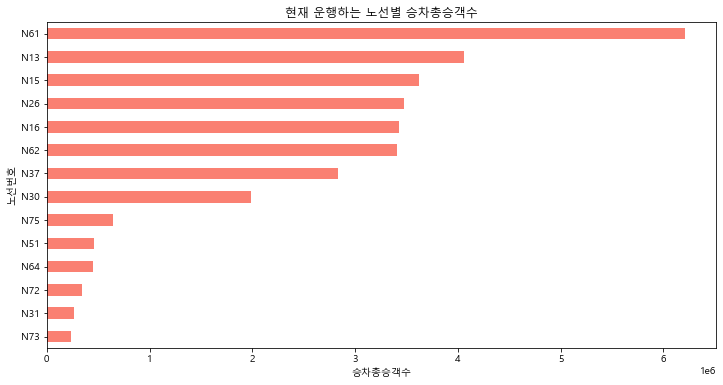

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\jiin\Desktop\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

# 모든 노선번호에 대한 승차총승객수를 저장할 데이터프레임
overall_total_boarding_df = pd.DataFrame()

# 현재 운행하는 노선번호
target_routes = ['N13', 'N15', 'N16', 'N26', 'N30', 'N31', 'N37', 'N51','N61', 'N62', 'N64', 'N72', 'N73', 'N75']

# 노선번호별 승차총승객수를 저장할 데이터프레임 (현재 운행하는 노선만)
target_total_boarding_df = pd.DataFrame()

# 각 연도별로 데이터 처리
for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    
    # CSV 파일을 데이터프레임으로 읽어오기
    df = pd.read_csv(file_path, encoding='cp949')
    
    # '승차총승객수' 열의 데이터 타입을 숫자(float)로 변환
    df['승차총승객수'] = pd.to_numeric(df['승차총승객수'], errors='coerce')
    
    # 전체 노선번호별로 그룹화하여 승차총승객수의 합계 계산
    total_boarding_per_route = df.groupby('노선번호')['승차총승객수'].sum().reset_index()
    
    # 노선번호를 인덱스로 설정
    total_boarding_per_route.set_index('노선번호', inplace=True)
    
    # 데이터프레임을 미리 생성한 데이터프레임에 추가
    overall_total_boarding_df = pd.concat([overall_total_boarding_df, total_boarding_per_route], axis=1)
    
    # 현재 운행하는 노선번호에 해당하는 데이터만 선택
    filtered_df = df[df['노선번호'].isin(target_routes)]
    
    # 현재 운행하는 노선번호별로 그룹화하여 승차총승객수의 합계 계산
    target_total_boarding_per_route = filtered_df.groupby('노선번호')['승차총승객수'].sum().reset_index()
    
    # 노선번호를 인덱스로 설정
    target_total_boarding_per_route.set_index('노선번호', inplace=True)
    
    # 데이터프레임을 미리 생성한 데이터프레임에 추가
    target_total_boarding_df = pd.concat([target_total_boarding_df, target_total_boarding_per_route], axis=1)

# 모든 노선번호에 대한 합계값 계산
overall_total_boarding = overall_total_boarding_df.sum(axis=1)

# 시각화 - 전체 노선번호
plt.figure(figsize=(12, 6))
ax = overall_total_boarding.sort_values().plot(kind='barh', color='skyblue')
plt.title('전체 노선별 승차총승객수(폐선포함)')
plt.xlabel('승차총승객수')
plt.ylabel('노선번호')

plt.show()

# 모든 노선번호에 대한 합계값 계산 (현재 운행하는 노선만)
target_overall_total_boarding = target_total_boarding_df.sum(axis=1)

# 시각화 - 현재 운행하는 노선번호만
plt.figure(figsize=(12, 6))
ax = target_overall_total_boarding.sort_values().plot(kind='barh', color='salmon')
plt.title('현재 운행하는 노선별 승차총승객수')
plt.xlabel('승차총승객수')
plt.ylabel('노선번호')

plt.show()
